# Train Flowers Recognition Classify Baseline

## Install dependency

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import os
from fastai.vision.all import *
import numpy as np
import pandas as pd
import matplotlib as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
import timm

In [5]:
import wandb
wandb.login()

from fastai.callback.wandb import *

# start logging a wandb run
wandb.init(project='Flowers Recognition')

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: thliang01. Use `wandb login --relogin` to force relogin


## Data Prepare

In [6]:
path = Path('flowers')
path.ls()

(#5) [Path('flowers/dandelion'),Path('flowers/daisy'),Path('flowers/sunflower'),Path('flowers/rose'),Path('flowers/tulip')]

In [7]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(288, method='squish')]
).dataloaders(path)

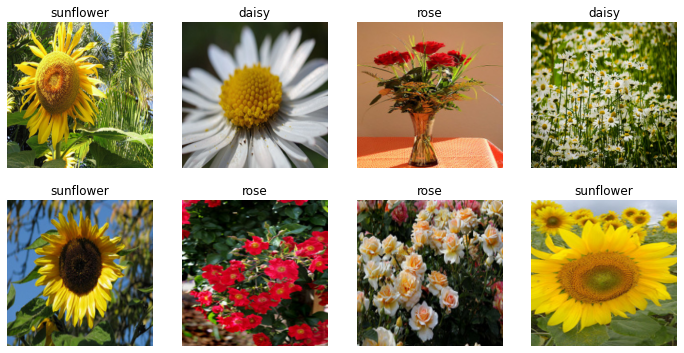

In [8]:
dls.show_batch(max_n=8)

## Choose Model 

In [9]:
timm.list_models('efficientnet*', pretrained=True)

['efficientnet_b0',
 'efficientnet_b1',
 'efficientnet_b1_pruned',
 'efficientnet_b2',
 'efficientnet_b2_pruned',
 'efficientnet_b3',
 'efficientnet_b3_pruned',
 'efficientnet_b4',
 'efficientnet_el',
 'efficientnet_el_pruned',
 'efficientnet_em',
 'efficientnet_es',
 'efficientnet_es_pruned',
 'efficientnet_lite0',
 'efficientnetv2_rw_m',
 'efficientnetv2_rw_s',
 'efficientnetv2_rw_t']

In [10]:
learn = vision_learner(
    dls,
    'resnet18',
    metrics=error_rate,
    cbs=WandbCallback()
).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /home/thomas/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


## Train Model

In [11]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,error_rate,time
0,1.035803,0.340280,0.113557,00:27


epoch,train_loss,valid_loss,error_rate,time
0,0.384888,0.282633,0.095017,00:34
1,0.321484,0.281295,0.096176,00:35
2,0.238568,0.252957,0.084589,00:24
3,0.174352,0.251188,0.078795,00:20
4,0.126189,0.268049,0.076477,00:15
5,0.092327,0.256174,0.071842,00:15
6,0.064006,0.254140,0.069525,00:15
7,0.047958,0.259922,0.074160,00:15
8,0.039911,0.249810,0.067207,00:15
9,0.033043,0.251543,0.067207,00:15


## Check result

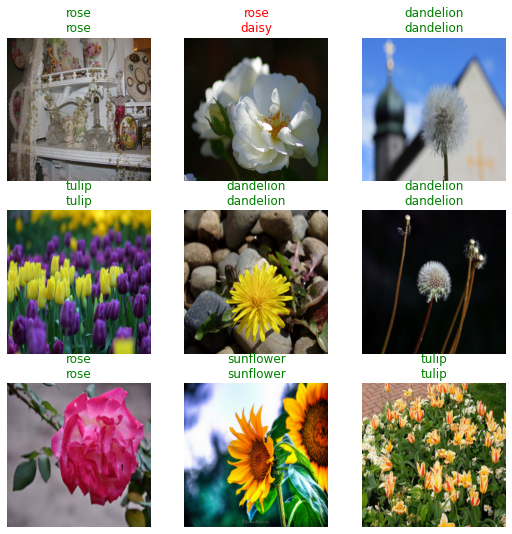

In [12]:
learn.show_results()

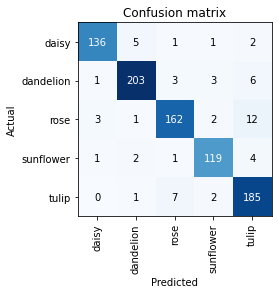

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()